In [1]:
from pathlib import Path

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from astropy.time import Time
import astropy.units as u
from astropy.visualization import time_support

import photutils

from skimage.transform import warp_polar

from fass.ser import load_ser_file
from fass.analyze_cube import find_apertures, moments, seeing, analyze_dimm_cube

_ = time_support(simplify=True)

In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# pupil size in the high speed cubes is 120 px in diameter
pup_ang = ((60 * u.pixel) * (0.93 * u.arcsec/u.pixel))
pup_ang

<Quantity 55.8 arcsec>

In [4]:
pup_mm = ((60 * u.pixel) * (9 * u.um/u.pixel)).to(u.mm)
pup_mm

<Quantity 0.54 mm>

In [5]:
opt_ang = np.arctan2(100, 2000) * u.rad
opt_ang

<Quantity 0.0499584 rad>

In [6]:
foc_shift = pup_mm / np.tan(opt_ang)
foc_shift

<Quantity 10.8 mm>

In [7]:
# thin lens eq 1/s1 + 1/s2 = 1/f where s2 = f - foc_shift

s1 = 1 / (1/(2000*u.mm) - 1/(2000*u.mm-foc_shift))
s1

<Quantity -368370.37037037 mm>

In [8]:
testfile = Path.home() / "MMT/FASS/data/indi_2022-08-29/indi_record_2022-08-29@05-54-59.ser"
d = load_ser_file(testfile)

/Users/tim/conda/envs/fass/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/tim/conda/envs/fass/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/tim/conda/envs/fass/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


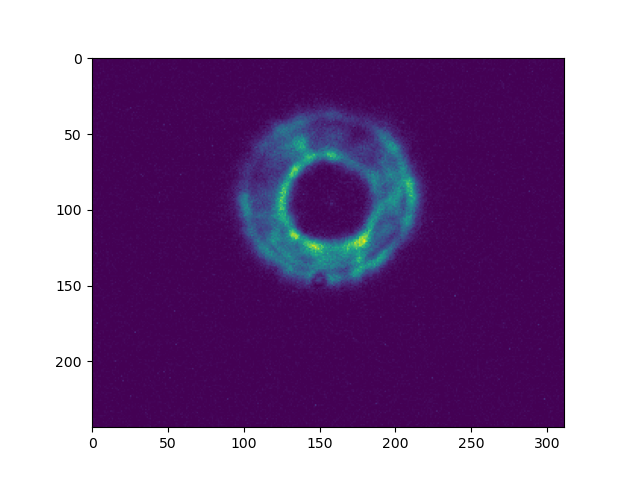

In [11]:
fig = plt.figure()
plt.imshow(d['data'][500, :, :])
plt.show()

In [12]:
i1 = 400
i2 = 431
image1 = d['data'][i1, :, :]
image2 = d['data'][i2, :, :]
warped1 = warp_polar(image1, (93,157), radius=70, output_shape=(120,120), scaling='linear')
warped2 = warp_polar(image2, (93,157), radius=70, output_shape=(120,120), scaling='linear')
diff = warped1 - warped2

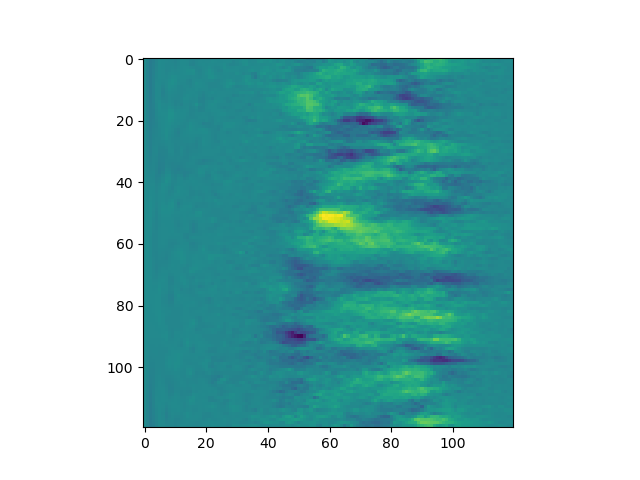

In [13]:
fig = plt.figure()
plt.imshow(diff)
plt.show()

In [27]:
coadd = d['data'][0:1000, :, :].sum(axis=0)

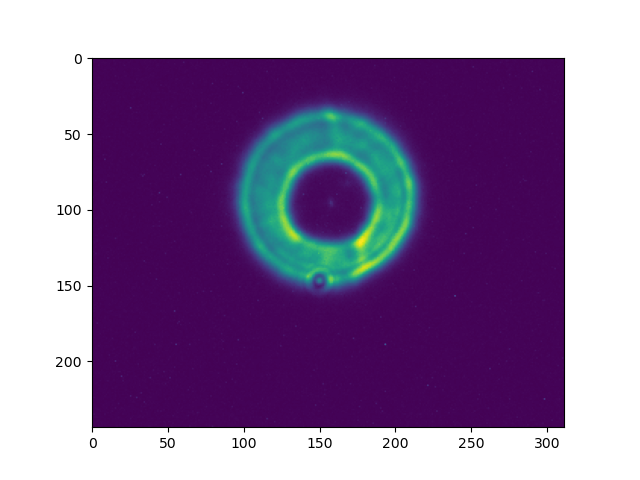

In [28]:
fig = plt.figure()
plt.imshow(coadd)
plt.show()